# Import libraries

In [39]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Model testing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Import data

In [40]:
data= pd.read_csv('dataset')

In [41]:
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
data['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

# Data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
classes = {}
lb = LabelEncoder()
data['gender'] = lb.fit_transform(data['gender'])
classes['gender'] = lb.classes_

data['ever_married'] = lb.fit_transform(data['ever_married'])
classes['ever_married'] = lb.classes_

data['work_type'] = lb.fit_transform(data['work_type'])
classes['work_type'] = lb.classes_

data['Residence_type'] = lb.fit_transform(data['Residence_type'])
classes['Residence_type'] = lb.classes_

data['smoking_status'] = lb.fit_transform(data['smoking_status'])
classes['smoking_status'] = lb.classes_
mean_value = data['bmi'].mean()
data['bmi'].fillna(value=mean_value, inplace=True)
for key, value in classes.items():
    print(key,"\t", value)
data.describe()

gender 	 ['Female' 'Male' 'Other']
ever_married 	 ['No' 'Yes']
work_type 	 ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Residence_type 	 ['Rural' 'Urban']
smoking_status 	 ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


# Data visualization

In [7]:
data.drop(['id'], axis = 1, inplace = True)

<AxesSubplot:>

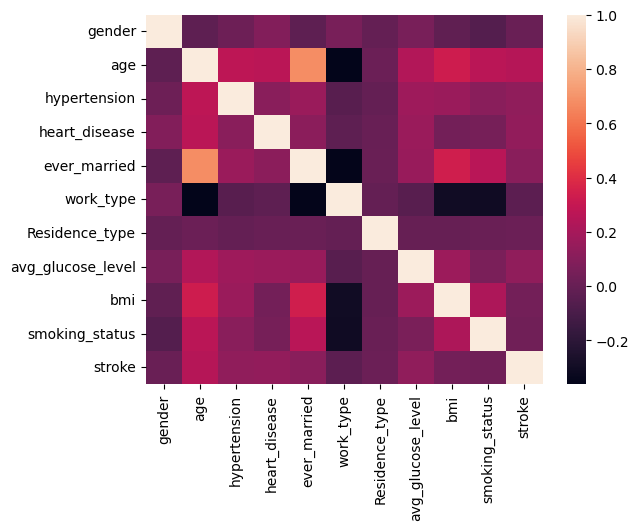

In [8]:
sns.heatmap(data.corr())

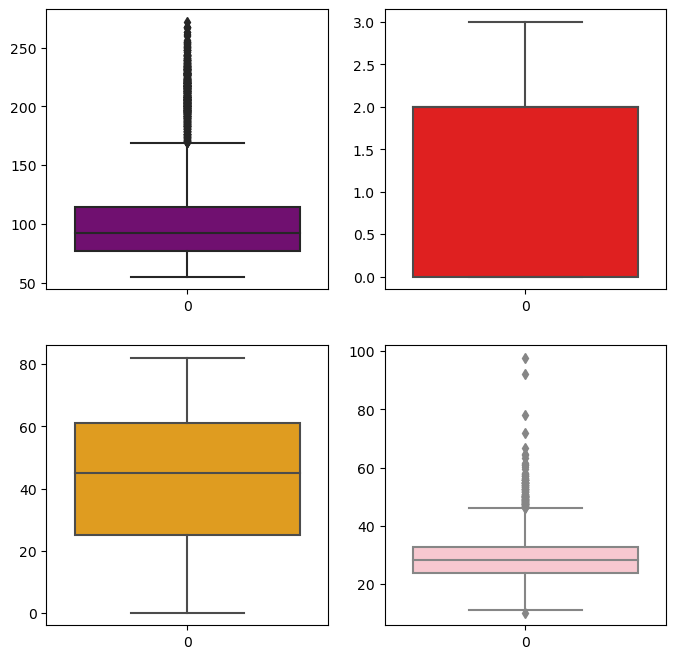

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (8, 8))
sns.boxplot(data = data['avg_glucose_level'], ax = ax[0, 0], color='purple')
sns.boxplot(data = data['smoking_status'], ax = ax[0, 1], color='red')
sns.boxplot(data = data['age'], ax = ax[1, 0], color='orange')
sns.boxplot(data = data['bmi'], ax = ax[1, 1], color='pink')
plt.show()

# Testing different models

In [10]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']
std = StandardScaler()
X = std.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
model_name = []
model_accuracy = []
def test_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    model_name.append(name)
    model_accuracy.append(accuracy)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    print(accuracy)
    disp.plot()
    plt.show()

# 1. Random Forest Classifier

0.9475743348982786


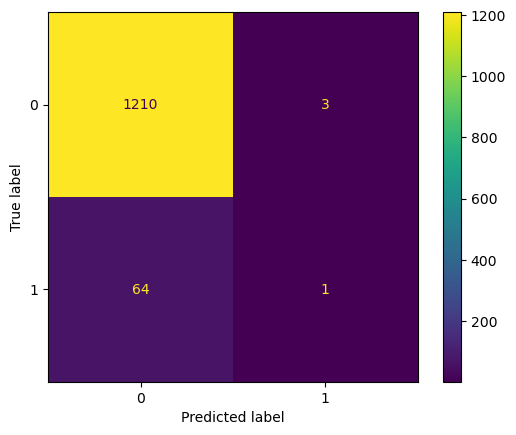

In [12]:
model = RandomForestClassifier(n_estimators = 10)
test_model(model, "Random Forest Classifier")

# 2. Support vector machine

0.9491392801251957


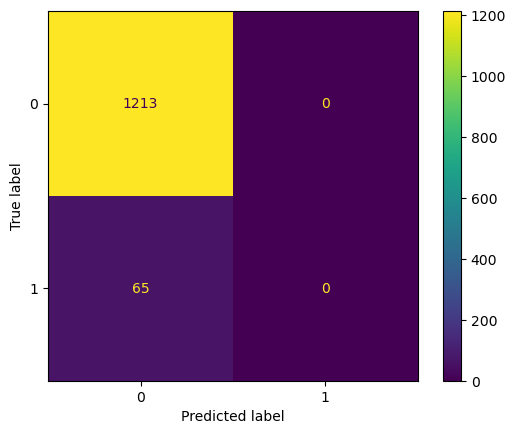

In [29]:
model = SVC(C=1.2, kernel='rbf')
test_model(model, "Support Vector Machine")

# 3. Decision Tree Classifier

0.9084507042253521


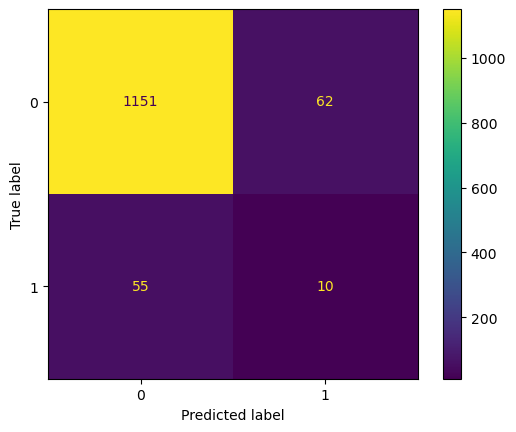

In [14]:
model = DecisionTreeClassifier(random_state = 0)
test_model(model, "Decision Tree Classifier")

# 4. Kneighbor classifier

0.9420970266040689


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


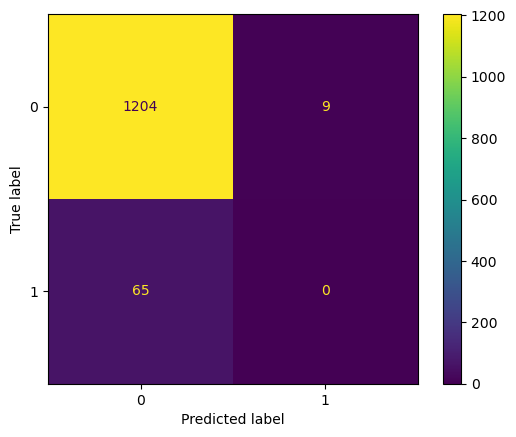

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
test_model(model, "KNeighbors Classifier")

# 5. Gaussian Naive Bayes

0.8826291079812206


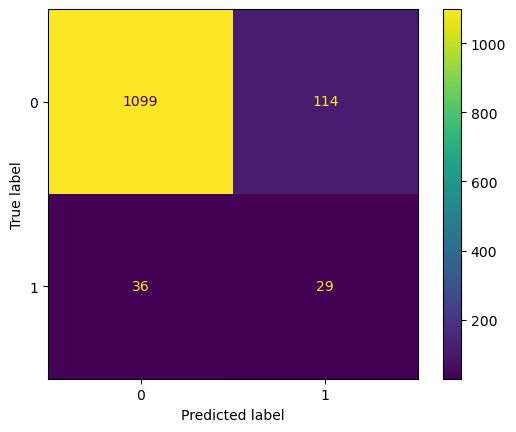

In [16]:
model = GaussianNB()
test_model(model, "Gaussian Naive Bayes")

# 6 Logistic Regression

0.9491392801251957


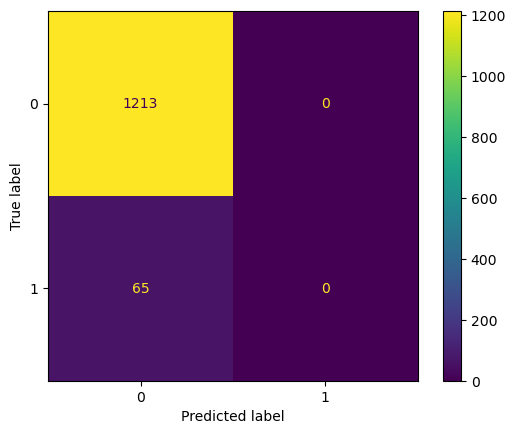

In [43]:
model_logistic = LogisticRegression()
test_model(model_logistic, "Logistic Regression")

# Plotting accuracies of different models

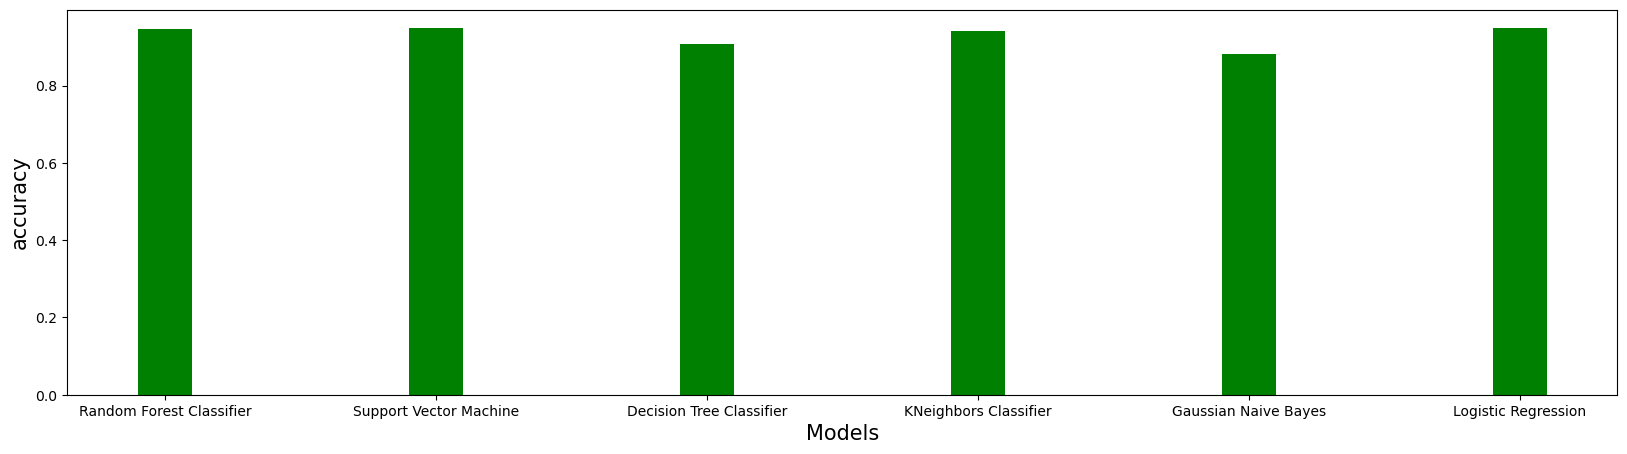

In [20]:
fig = plt.figure(figsize = (20, 5))
plt.bar(model_name, model_accuracy, width = 0.2, color='green')
plt.xlabel("Models", fontsize = 15)
plt.ylabel("accuracy", fontsize = 15)
# plt.xticks()
plt.show()

In [46]:
import pickle
from sklearn.ensemble import RandomForestClassifier

with open('model.pkl', 'wb') as file:
    pickle.dump(model_logistic, file)
